In [1]:
#Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#all feature already convert by PCA method and all feature convert into numerical values by data provider.due to sensitive data 
#which is done by data provider.

In [4]:
# time is given in seconds format for each transactions and v1,v2,....so on is particular transactions
data=pd.read_csv("creditcard_data.csv")
data.head(5)
#the amount feature is in dollars.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.tail(4)  # data was around 2 days

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#we get some information about dataset 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#checking null values in dataset
(data.isnull().sum())/100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
data["Amount"].value_counts().sort_values()

95.63         1
902.00        1
393.55        1
694.81        1
102.18        1
          ...  
15.00      3280
9.99       4747
0.89       4872
1.98       6044
1.00      13688
Name: Amount, Length: 32767, dtype: int64

In [12]:
data["Amount"].value_counts().sort_values(ascending=False)

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
694.81        1
393.55        1
902.00        1
283.40        1
95.63         1
Name: Amount, Length: 32767, dtype: int64

In [13]:
data[data.Amount==1].head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,-1.444036,2.846914,0.627549,0.387778,-3.279054,0.553435,0.910634,2.698337,1.302963,-0.910149,-0.01680,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.0,0
109,73.0,1.239048,0.293284,0.086472,1.178277,0.373344,0.325596,0.119319,-0.025476,0.173211,-0.154186,-1.089323,0.870714,1.177662,-0.217738,-0.161084,-0.533763,-0.108368,-0.848425,-0.056693,-0.10357,-0.148136,-0.111893,-0.173207,-0.714729,0.817360,-0.263843,0.047777,0.008735,1.0,0


In [14]:
data.loc[data.Amount==1.0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,-1.444036,2.846914,0.627549,0.387778,-3.279054,0.553435,0.910634,2.698337,1.302963,-0.910149,-0.016800,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.0,0
109,73.0,1.239048,0.293284,0.086472,1.178277,0.373344,0.325596,0.119319,-0.025476,0.173211,-0.154186,-1.089323,0.870714,1.177662,-0.217738,-0.161084,-0.533763,-0.108368,-0.848425,-0.056693,-0.103570,-0.148136,-0.111893,-0.173207,-0.714729,0.817360,-0.263843,0.047777,0.008735,1.0,0
166,105.0,1.175094,0.408263,0.552145,1.255068,-0.196662,-0.565605,0.133973,-0.146202,-0.214155,-0.011310,0.290717,0.975735,1.117979,0.144788,1.037954,-0.292529,-0.142181,-0.767216,-0.962711,-0.116439,0.130585,0.523640,-0.050125,0.448133,0.597867,-0.275067,0.043308,0.023924,1.0,0
168,107.0,1.175125,0.661341,-0.477476,1.102542,0.543328,-0.246785,0.165234,0.027018,-0.423144,-0.574065,1.853388,0.870531,0.496566,-1.251017,0.598737,0.567820,0.768163,0.672152,-0.574587,-0.069415,-0.003071,0.093738,-0.154355,-0.425097,0.652435,-0.296802,0.051425,0.041876,1.0,0
245,167.0,1.321778,0.658048,-0.793312,0.429647,0.417966,-0.927679,0.180923,-0.236763,0.020143,-1.121743,-0.149294,0.082584,1.193951,-2.380820,1.241258,1.163572,1.097111,0.788935,-0.109340,0.069873,-0.248709,-0.599280,-0.138226,-0.587577,0.499087,0.589339,-0.013969,0.055506,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284474,172477.0,2.127952,-0.141673,-1.877725,-0.061199,0.615308,-0.281799,0.071005,-0.126117,0.552888,0.210203,-0.357059,0.106564,-0.585167,0.762394,0.228387,0.416407,-1.204941,0.975373,0.578987,-0.243205,0.197225,0.670737,-0.171471,-1.370701,0.393657,-0.040510,-0.030360,-0.084520,1.0,0
284595,172586.0,-3.744365,3.441659,-3.613953,-1.019648,-1.387668,-0.914414,-1.841381,3.073614,-0.649651,-1.404660,-2.808135,0.973100,0.590570,2.523563,-0.116503,1.044125,0.214590,0.619515,-0.569844,-0.877753,0.723106,0.923571,0.136657,0.050813,-0.178107,-0.351371,-1.271049,-0.176898,1.0,0
284640,172630.0,-0.805148,2.322504,0.479749,4.293397,0.567406,-0.081910,0.690709,0.153626,-2.485845,1.797641,-0.901974,-0.291982,0.870180,0.687448,0.762295,-0.209053,0.240969,-0.274437,1.222892,0.188055,-0.007951,-0.171133,-0.033815,0.025967,-0.456773,0.151083,-0.130415,0.181454,1.0,0
284764,172751.0,-0.575199,1.203222,0.071547,-0.303772,1.048679,-0.192258,0.848642,-0.038083,-0.616851,-0.485646,-1.093125,0.322357,1.395033,0.267370,1.028843,-0.587741,-0.313156,0.220559,0.981606,0.093053,0.302626,0.987082,-0.488776,0.260397,0.385658,0.040083,-0.300694,-0.156757,1.0,0


In [15]:
data.Amount.unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

<AxesSubplot:ylabel='Class'>

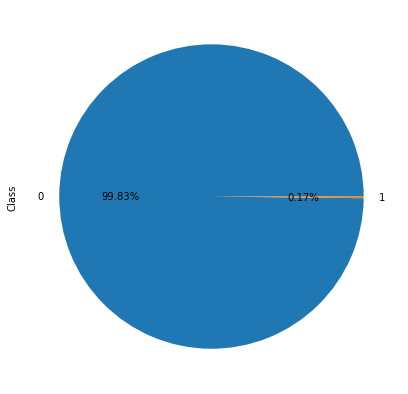

In [36]:
plt.figure(figsize=(10,7))
data['Class'].value_counts().plot.pie(autopct='%.2f%%')

In [16]:
data.loc[data.Amount==149.62]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
58221,48285.0,0.939873,-1.187141,0.806928,0.225794,-1.412897,0.255534,-0.858395,0.243810,-0.238081,0.544596,-0.3590,-0.480631,-1.189417,0.076937,0.985256,-1.968555,0.778698,0.434536,-1.827315,-0.387496,-0.124889,-0.048714,-0.023473,0.081591,0.073587,0.532036,0.020278,0.041290,149.62,0


In [17]:
len(data[data.Amount==1])

13688

In [18]:
#In this data class feature is target variable.0 means transaction is legit and 1 means fraud transaction. 

In [19]:
# we see the distribution of legit and fraud transaction in dataset.
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
#that dataset is not normal distributed due to high 99% transaction is legit transaction we can't give this data to our ml model
# if we give any data ponit to ml model it will return legit transaction because legit percentage is very high. 

In [21]:
data.Class.unique()

array([0, 1], dtype=int64)

In [22]:
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [23]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


<AxesSubplot:ylabel='Frequency'>

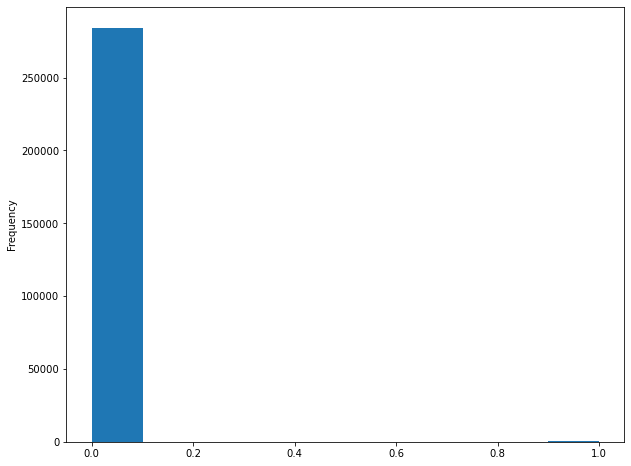

In [24]:
data["Class"].plot(kind="hist",figsize=(10,8))

In [25]:
data.duplicated().sum()

1081

In [26]:
data.loc[data.duplicated(),:].head() #we are checking those transaction which were duplicated.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [27]:
#Classifying whether credit card transactions are authentic or fraudulent using algorithms such as logistic regression, random forests, 
#support vector machines (SVMs)

<AxesSubplot:>

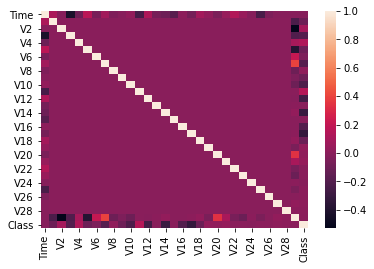

In [28]:
sns.heatmap(data.corr())

In [29]:
print(min(data.Amount))
print(max(data.Amount))

0.0
25691.16


<AxesSubplot:ylabel='Density'>

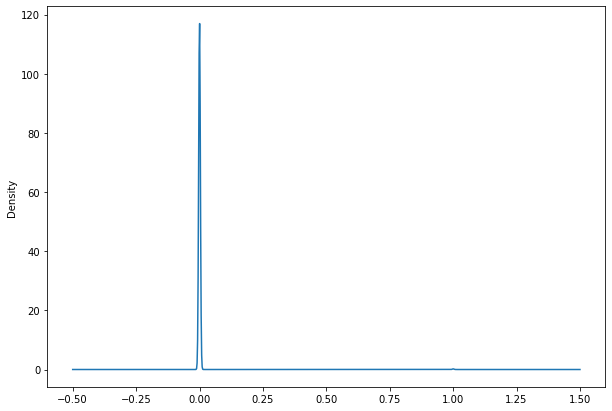

In [30]:
data.Class.plot(kind="kde",figsize=(10,7)) #we can clearly see that class 0 is highly in numbers and distribution is very high.

In [31]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [32]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [33]:
fraud.Amount.describe() #the mean value is bigger in case of fraud transactions and sd also greater then in fraud.

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [38]:
#compare the value of both value
data.groupby("Class").mean()
#mean between legit and fraud transaction difference is huge which is useful for ml model prediction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<AxesSubplot:xlabel='Amount'>

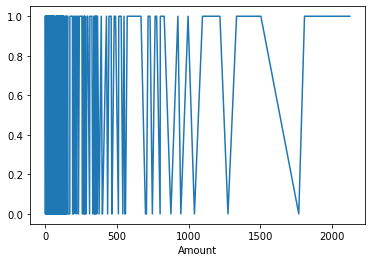

In [66]:
new_data.groupby("Amount")["Class"].max().plot(kind="line")

In [ ]:
new_data.groupby("Class").max()

In [ ]:
corr=new_data["Amount"].corr(new_data["Class"])
corr

In [ ]:
#dealing with imbalanced data 

In [ ]:
#more than 2 lakh entries are belong to legit transaction so we have purly inbalanced data so we go with 
#under sampling method for tackle this kind of problems.

In [ ]:
#build a sample dataset from original dataset 

In [43]:
legit_sample=legit.sample(n=492)

In [44]:
legit_sample.shape

(492, 31)

In [45]:
#concat the both data lgeit_sample and fraud data 

In [46]:
new_data=pd.concat([legit_sample,fraud],axis=0)

In [47]:
new_data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
160157,113142.0,2.094027,-0.015393,-1.519437,0.140248,0.304630,-0.816780,0.176906,-0.296122,0.729772,-0.105518,-0.863074,0.354243,0.314791,0.419075,0.888505,-0.223749,-0.628033,0.142566,-0.118288,-0.206431,0.255354,0.895915,-0.011111,0.606357,0.383825,-0.443921,0.004852,-0.048216,1.00,0
235713,148511.0,0.147497,1.033395,-0.452283,-0.566241,0.965040,-0.766555,0.996424,-0.113318,-0.062794,-0.841743,-0.765750,-0.081341,0.165675,-1.051098,-0.246188,0.358141,0.317764,-0.195373,-0.189105,0.040254,-0.344947,-0.844025,0.089702,0.476225,-0.399851,0.118445,0.221708,0.083849,7.18,0
261995,160264.0,0.139416,0.956206,-0.693479,-0.677663,1.241242,-0.455550,1.012355,-0.087288,-0.048671,-0.852932,-1.228503,-0.186821,0.403943,-1.108593,-0.219534,0.511880,0.111879,-0.029074,0.011994,0.104056,-0.368626,-0.935787,0.057591,-0.065977,-0.315792,0.151293,0.216193,0.080293,19.78,0
38906,39611.0,1.423513,-1.433416,0.609187,-1.459284,-1.908105,-0.347609,-1.523929,0.185939,-1.395500,1.668960,0.389491,-1.874323,-2.342380,0.263545,0.486782,0.284157,0.168491,1.273843,-0.015567,-0.427224,-0.047460,0.038765,-0.043351,-0.075844,0.246454,-0.093710,0.023359,0.012390,40.00,0


In [48]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [49]:
new_data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Count'>

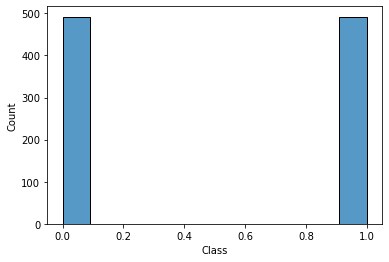

In [50]:
sns.histplot(x="Class",data=new_data)

<AxesSubplot:ylabel='Class'>

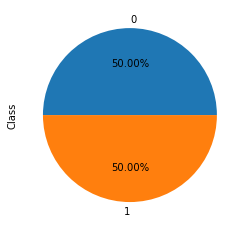

In [57]:
new_data['Class'].value_counts().plot.pie(autopct='%.2f%%')

<AxesSubplot:ylabel='Density'>

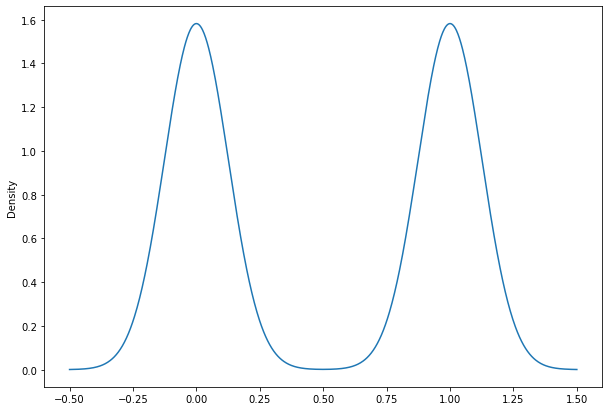

In [60]:
new_data.Class.plot(kind='kde',figsize=(10,7))
#new_data[new_data["Class"]==1].plot(kind="bar",figsize=(10,7))

In [52]:
new_data[new_data["Class"]==0].min()

Time      117.000000
V1        -16.224299
V2         -4.691414
V3        -12.841065
V4         -3.962500
V5         -8.986583
V6         -3.077067
V7         -8.219623
V8         -8.728292
V9         -2.895535
V10        -2.975955
V11        -3.962664
V12        -3.903908
V13        -2.504600
V14        -4.593436
V15        -2.809880
V16        -2.797430
V17        -2.421831
V18        -2.656998
V19        -2.765594
V20        -4.806881
V21        -1.855464
V22        -4.292218
V23        -1.276505
V24        -2.155730
V25        -2.386075
V26        -1.363879
V27        -6.156626
V28        -2.505810
Amount      0.000000
Class       0.000000
dtype: float64

In [53]:
new_data[new_data["Class"]==1].shape

(492, 31)

In [54]:
new_data.groupby("Class").mean() # mean is still same so our ml model easily detect our transaction is fraud or not.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,97260.085366,-0.022262,0.200164,-0.018113,-0.109142,-0.088159,-0.029682,-0.006213,0.028941,0.049625,0.039680,0.056126,0.073267,0.001018,0.007444,-0.047336,0.003138,0.040542,0.004951,-0.012061,-0.020852,0.000347,-0.033455,0.037778,-0.011132,-0.004214,-0.002735,0.001553,0.002461,70.932561
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [55]:
x=new_data.drop("Class",axis=1)
y=new_data.Class
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
160157  113142.0  2.094027 -0.015393 -1.519437  0.140248  0.304630 -0.816780   
235713  148511.0  0.147497  1.033395 -0.452283 -0.566241  0.965040 -0.766555   
261995  160264.0  0.139416  0.956206 -0.693479 -0.677663  1.241242 -0.455550   
38906    39611.0  1.423513 -1.433416  0.609187 -1.459284 -1.908105 -0.347609   
130743   79422.0  1.245700 -0.458680  0.879194 -0.710195 -1.346037 -0.861574   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [56]:
print(y)

160157    0
235713    0
261995    0
38906     0
130743    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
#Spliting the data into train and test 
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51,stratify=y)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

In [ ]:
#model training (apply logistic regression when we have binary classification problems)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression() #training lr model with our training data

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
#model evalution

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lr_x_train_pred=lr.predict(x_train)
training_data_acc=accuracy_score(lr_x_train_pred,y_train)
print("accuracy score is:-",training_data_acc)

In [ ]:
#test model evalution

In [ ]:
lr_x_test_pred=lr.predict(x_test)
test_data_acc=accuracy_score(x_test_pred,y_test)
print("accuracy score of test is:-",test_data_acc)

In [ ]:
lr.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_test=f1_score(lr_x_test_pred,y_test)

In [ ]:
print("the f1_score is:-",f1_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [ ]:
 dt.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dt_x_train_pred=dt.predict(x_train)

In [ ]:
x_train_acc=accuracy_score(dt_x_train_pred,y_train)
print("the accuracy score is:-",x_train_acc)

In [ ]:
#accuracy check here for test data
dt_x_test_pred=dt.predict(x_test)
x_test_acc=accuracy_score(x_test_pred,y_test)
print("the accuary score is:-",x_test_acc)

In [ ]:
dt_f1_score=f1_score(dt_x_test_pred,y_test)

In [ ]:
print("the f1_score for decision tree is:-",dt_f1_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfd=RandomForestClassifier(max_depth=4)

In [ ]:
rfd.fit(x_train,y_train)

In [ ]:
#lets check accuracy here for train data
rfd_x_train_pred=rfd.predict(x_train)

In [ ]:
x_train_acc=accuracy_score(x_train_pred,y_train)
print("the accuracy of random_forest is:-",x_train_acc)

In [ ]:
#now let's check accuarcy of test data
rfd_x_test_pred=rfd.predict(x_test)

In [ ]:
x_test_acc=accuracy_score(x_test_pred,y_test)
print("the accurcy score is:-",x_test_acc)

In [ ]:
rfd_f1_score=f1_score(rfd_x_test_pred,y_test)

In [ ]:
print("the f1_score of random forest classifier is:-",rfd_f1_score)

In [ ]:
#here we can see that difference between algo. accuracy and f1_score is just similar so our model is not facing overfiting and
# underfitting issues which is good for us.